# Instalacion de Paquetes

In [ ]:
%pip install --upgrade pip
%pip install OpenNMT-py
#!pip install OpenNMT-py==3.0.0
%pip install nltk
%pip install matplotlib
%pip install --upgrade --force-reinstall sacrebleu
%pip install --upgrade --force-reinstall torchmetrics
import nltk
%pip install tensorrt
nltk.download('punkt')
nltk.download('wordnet')
basepath="/Experimento/"

In [ ]:
import os
import numpy as np

: 

# Prueba con isignos

In [ ]:
!onmt_build_vocab -config  ./Experimento/isignos_config.yaml -n_sample -1

In [ ]:
!onmt_train -config ./Experimento/isignos_config.yaml 

In [ ]:
step=500
version=0
cantidad_steps=10000
while version <cantidad_steps:
  version=version+step
  nombre="_step_"+str(version)
  path="./Experimento/Trainisignos/"+nombre+".pt"
  salida="./Experimento/Trainisignos/pred_dev"+nombre+".txt"
  !onmt_translate -model {path} -src "./Experimento/data/isignos/spoken_dev.txt" -output {salida}  -verbose

In [20]:
from sacrebleu.metrics import BLEU
from nltk.translate import meteor,chrf_score
from nltk import word_tokenize
from torchmetrics import CHRFScore
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.meteor_score import meteor_score

ResultadosBleu=[]
ResultadosChrf=[]

step=500
version=500
cantidad_steps=10000
target='./Experimento/data/isignos/gloss_dev.txt'

with open(target,'r', encoding='utf-8') as f:
    refs   = f.readlines()
    f.close()
for ref in refs:
  ref=ref.split()
while version <10000:
  version=version+step
  nombre="_step_"+str(version)
  pred="./Experimento/Trainisignos/pred_dev"+nombre+".txt"

  with open(pred,'r', encoding='utf-8') as f:
    hyps   = f.readlines()
    f.close()
  for hyp in hyps:
    hyp=hyp.split()
  weights = (1, 0, 0)
  print(refs)
  print(hyps)
  bleu_score_corpus = corpus_bleu(refs,hyps,weights)
  ResultadosBleu.append(bleu_score_corpus)

  chrf_score_corpus = chrf_score.corpus_chrf(refs, hyps)
  ResultadosChrf.append(chrf_score_corpus)


print(ResultadosChrf)
print(ResultadosBleu)

['LOS-DOS SORDO ESTE\n', 'SIGNAR\n', 'UNO FOTO-SOSTENER FOTOGRAFÍA ESTE\n', 'VER ESTE\n', 'VER\n', 'ALGUNO PERSONA PEQUEÑO PASADO EX COLEGIO\n', 'ESTE FOTO-SOSTENER SABER TÚ\n', 'YO LOS-DOS PEQUEÑO\n', 'DENTRO\n', 'TÚ FOTOGRAFÍA DENTRO\n', 'CONOCER FOTO-SOSTENER PERSONA CONOCER ESTE\n', 'TÚ BIEN- RESPONDER TÚ\n', 'YO\n', 'TÚ ESTE RECORDAR\n', 'PASADO COLEGIO\n', 'AHORA CASAR\n', 'DIVORCIARSE\n', 'DIVORCIARSE\n', 'DESPUÉS HIJO COLEGIO\n', 'DESPUÉS TRABAJAR\n', 'ESPERAR TÚ NOMBRE TÚ\n', 'SIGNO NOMBRE NOMBRE NOMBRE-\n', 'NOMBRE NOMBRE- SIGNO ANTONIO-\n', 'ANTONIO- SIGNO ANTONIO\n', 'SIGNO- NOMBRE VERDAD ANTONIO\n', 'BIEN TÚ EDAD TÚ\n', 'CINCO- HOY CINCO^UNO\n', 'A-PARTIR-DE VERDAD CINCO^UNO TODAVÍA\n', 'BIEN TÚ\n', 'TÚ VIVIR DÓNDE\n', 'VIGO\n', 'TÚ NACER LUGO\n', 'LUGO PUEBLO MIRA-TÚ\n', 'MIRA-TÚ\n', 'BIEN TÚ NACER SORDO\n', 'O NACER ESPERAR OYENTE\n', 'ESPERAR OYENTE NACER- ESPERAR NACER OYENTE\n', 'A-PARTIR-DE DOCE EDAD OÍDO-APAGADO\n', 'MOTIVO MENINGITIS OÍDO-APAGADO\n', 'COMA SEMANA\n

c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


['LOS-DOS SORDO ESTE\n', 'SIGNAR\n', 'UNO FOTO-SOSTENER FOTOGRAFÍA ESTE\n', 'VER ESTE\n', 'VER\n', 'ALGUNO PERSONA PEQUEÑO PASADO EX COLEGIO\n', 'ESTE FOTO-SOSTENER SABER TÚ\n', 'YO LOS-DOS PEQUEÑO\n', 'DENTRO\n', 'TÚ FOTOGRAFÍA DENTRO\n', 'CONOCER FOTO-SOSTENER PERSONA CONOCER ESTE\n', 'TÚ BIEN- RESPONDER TÚ\n', 'YO\n', 'TÚ ESTE RECORDAR\n', 'PASADO COLEGIO\n', 'AHORA CASAR\n', 'DIVORCIARSE\n', 'DIVORCIARSE\n', 'DESPUÉS HIJO COLEGIO\n', 'DESPUÉS TRABAJAR\n', 'ESPERAR TÚ NOMBRE TÚ\n', 'SIGNO NOMBRE NOMBRE NOMBRE-\n', 'NOMBRE NOMBRE- SIGNO ANTONIO-\n', 'ANTONIO- SIGNO ANTONIO\n', 'SIGNO- NOMBRE VERDAD ANTONIO\n', 'BIEN TÚ EDAD TÚ\n', 'CINCO- HOY CINCO^UNO\n', 'A-PARTIR-DE VERDAD CINCO^UNO TODAVÍA\n', 'BIEN TÚ\n', 'TÚ VIVIR DÓNDE\n', 'VIGO\n', 'TÚ NACER LUGO\n', 'LUGO PUEBLO MIRA-TÚ\n', 'MIRA-TÚ\n', 'BIEN TÚ NACER SORDO\n', 'O NACER ESPERAR OYENTE\n', 'ESPERAR OYENTE NACER- ESPERAR NACER OYENTE\n', 'A-PARTIR-DE DOCE EDAD OÍDO-APAGADO\n', 'MOTIVO MENINGITIS OÍDO-APAGADO\n', 'COMA SEMANA\n

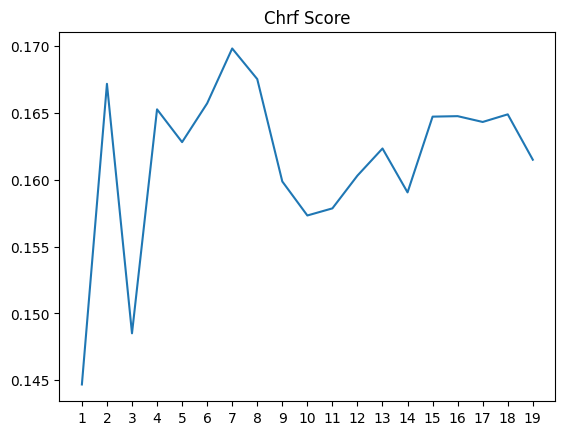

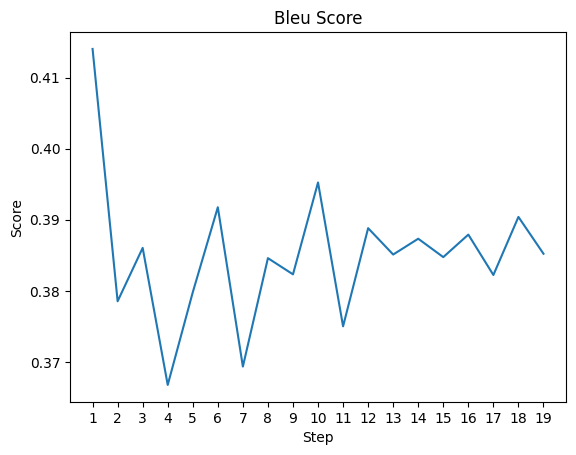

In [21]:
import math
import matplotlib.pyplot as plt
y = ResultadosChrf
x = [x for x in  range(1, len(ResultadosChrf)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)

plt.title('Chrf Score')
plt.show()

y = ResultadosBleu
x = [x for x in  range(1, len(ResultadosBleu)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('Bleu Score')
plt.show()

# Prueba con iddl

In [17]:
!onmt_build_vocab -config  ./Experimento/dataiddl.yaml -n_sample -1

^C


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Scripts\onmt_build_vocab.exe\__main__.py", line 7, in <module>
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\onmt\bin\build_vocab.py", line 283, in main
    build_vocab_main(opts)
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\onmt\bin\build_vocab.py", line 213, in build_vocab_main
    ArgumentParser.validate_prepare_opts(opts, build_vocab_only=True)
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\onmt\utils\parse.py", line 200, in validate_prepare_opts
    cls._validate_data(opt)
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\onmt\utils\parse.py", line 62, in _validate_data
    cls._validate_file(path_src, info=f"{cname}/path_src")
  File "c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\s

In [ ]:
!onmt_train -config ./Experimento/Prueba/dataiddl.yaml

In [ ]:
step=500
version=0
cantidad_steps=10000
while version <cantidad_steps:
  version=version+step
  nombre="_step_"+str(version)
  path="./Experimento/Trainiddl/"+nombre+".pt"
  salida="./Experimento/Trainiddl/pred_dev"+nombre+".txt"
  !onmt_translate -model {path} -src "./Experimento/data/iddl/spoken_test.txt" -output {salida}  -verbose

In [22]:
from sacrebleu.metrics import BLEU
from nltk.translate import meteor,chrf_score
from nltk import word_tokenize
from torchmetrics import CHRFScore
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.meteor_score import meteor_score

ResultadosBleu=[]
ResultadosChrf=[]

step=500
version=500
cantidad_steps=10000
target='Experimento/data/iddl/gloss_dev.txt'

with open(target,'r', encoding='utf-8') as f:
    refs   = f.readlines()
    f.close()
for ref in refs:
  ref=ref.split()
while version <10000:
  version=version+step
  nombre="_step_"+str(version)
  pred="Experimento/Trainiddl/pred_dev"+nombre+".txt"

  with open(pred,'r', encoding='utf-8') as f:
    hyps   = f.readlines()
    f.close()
  for hyp in hyps:
    hyp=hyp.split()
  weights = (1, 0, 0)
  print(refs)
  print(hyps)
  bleu_score_corpus = corpus_bleu(refs,hyps,weights)
  ResultadosBleu.append(bleu_score_corpus)

  chrf_score_corpus = chrf_score.corpus_chrf(refs, hyps)
  ResultadosChrf.append(chrf_score_corpus)


print(ResultadosChrf)
print(ResultadosBleu)

['FUTURO TÚ OBLIGATORIO PREPARAR PLURAL FOTOGRAFÍA Y PLURAL DOCUMENTO PLURAL NECESARIO\n', 'SE-LLAMA NECESARIO TENER DNI PARA PARTICIPAR EXÁMEN\n', 'DNI SE-LLAMA DOCUMENTO OFICIAL QUE ACREDITAR REAL IDENTIDAD DUEÑO PROPIO DNI\n', 'DESDE TREINTA PLURAL AÑO EDAD FUTURO TÚ NECESITAR RENOVAR DNI CADA DIEZ PLURAL AÑO\n', 'PARA RENOVAR DNI FUTURO TÚ NECESITAR ENTREGAR PLURAL DOCUMENTO PLURAL NECESARIO\n', 'TÚ NO PODER TENER GAFAS CON PLURAL CRISTAL PLURAL NEGRO DÓNDE PLURAL FOTOGRAFÍA\n', 'INSCRIPCIÓN PARA PLURAL HOTEL PLURAL RESIDENCIA PLURAL ALBERGUE Y PLURAL CASA\n', 'MOMENTO TÚ DECLARAR DELANTE PLURAL AUTORIDAD PLURAL ABOGADO PLURAL PÚBLICO PLURAL TRIBUNAL PLURAL JUEZ Y PLURAL OFICINA PLURAL PÚBLICA\n', 'FUTURO TÚ NECESITAR TENER TAMBIÉN CERTIFICADO ACREDITAR DOMICILIO PROPIO TÚ\n', 'TÚ OBLIGATORIO ENTREGAR VIEJO DNI CUÁNDO TÚ RECOGER NUEVO DNI\n', 'NÚMERO DNI SE-LLAMA OBLIGATORIO DÓNDE\n', 'TÚ NECESITAR RENOVAR DNI CADA CINCO PLURAL AÑO\n', 'LITUANIA LUXEMBURGO MALTA MARRUECOS MÓNACO NO

c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\GastónPaiva\Downloads\Proyecto\.conda\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


['FUTURO TÚ OBLIGATORIO PREPARAR PLURAL FOTOGRAFÍA Y PLURAL DOCUMENTO PLURAL NECESARIO\n', 'SE-LLAMA NECESARIO TENER DNI PARA PARTICIPAR EXÁMEN\n', 'DNI SE-LLAMA DOCUMENTO OFICIAL QUE ACREDITAR REAL IDENTIDAD DUEÑO PROPIO DNI\n', 'DESDE TREINTA PLURAL AÑO EDAD FUTURO TÚ NECESITAR RENOVAR DNI CADA DIEZ PLURAL AÑO\n', 'PARA RENOVAR DNI FUTURO TÚ NECESITAR ENTREGAR PLURAL DOCUMENTO PLURAL NECESARIO\n', 'TÚ NO PODER TENER GAFAS CON PLURAL CRISTAL PLURAL NEGRO DÓNDE PLURAL FOTOGRAFÍA\n', 'INSCRIPCIÓN PARA PLURAL HOTEL PLURAL RESIDENCIA PLURAL ALBERGUE Y PLURAL CASA\n', 'MOMENTO TÚ DECLARAR DELANTE PLURAL AUTORIDAD PLURAL ABOGADO PLURAL PÚBLICO PLURAL TRIBUNAL PLURAL JUEZ Y PLURAL OFICINA PLURAL PÚBLICA\n', 'FUTURO TÚ NECESITAR TENER TAMBIÉN CERTIFICADO ACREDITAR DOMICILIO PROPIO TÚ\n', 'TÚ OBLIGATORIO ENTREGAR VIEJO DNI CUÁNDO TÚ RECOGER NUEVO DNI\n', 'NÚMERO DNI SE-LLAMA OBLIGATORIO DÓNDE\n', 'TÚ NECESITAR RENOVAR DNI CADA CINCO PLURAL AÑO\n', 'LITUANIA LUXEMBURGO MALTA MARRUECOS MÓNACO NO

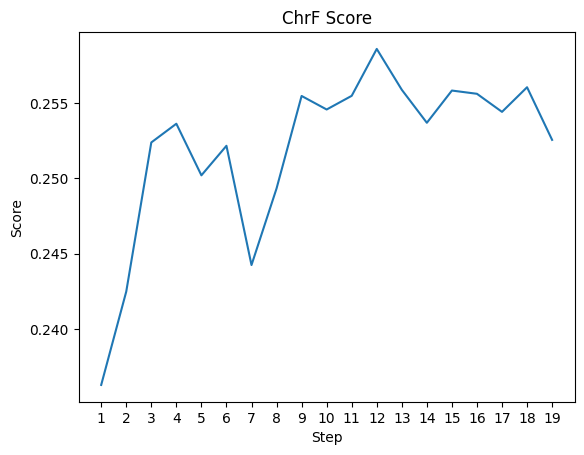

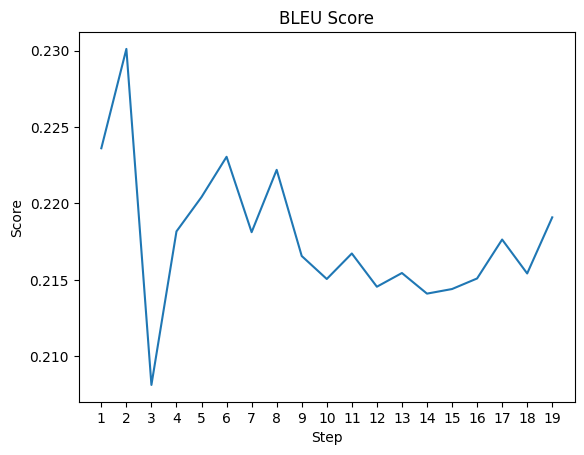

In [23]:
import math
import matplotlib.pyplot as plt
# Plot ChrF Score
y = ResultadosChrf
x = list(range(1, len(ResultadosChrf) + 1))
new_list = range(math.floor(min(x)), math.ceil(max(x)) + 1)
plt.xticks(new_list)
plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('ChrF Score')
plt.show()

# Plot BLEU Score
y = ResultadosBleu
x = list(range(1, len(ResultadosBleu) + 1))
new_list = range(math.floor(min(x)), math.ceil(max(x)) + 1)
plt.xticks(new_list)
plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('BLEU Score')
plt.show()

Prueba con Datos Uruguayos


In [24]:
!onmt_build_vocab -config  "./Experimento/dataUruguay.yaml" -n_sample -1

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2024-06-16 01:29:28,233 INFO] Counter vocab from -1 samples.
[2024-06-16 01:29:28,233 INFO] n_sample=-1: Build vocab on full datasets.
[2024-06-16 01:29:31,667 INFO] Counters src: 286
[2024-06-16 01:29:31,667 INFO] Counters tgt: 185
[2024-06-16 01:29:31,667 WARNING] path ./Experimento/TrainDatosUruguayos/example.vocab.src exists, may overwrite...
[2024-06-16 01:29:31,667 WARNING] path ./Experimento/TrainDatosUruguayos/example.vocab.tgt exists, may overwrite...


In [6]:
!onmt_train -config   "./Experimento/dataUruguay.yaml"

^C


In [ ]:
step=500
version=0
cantidad_steps=10000
while version <cantidad_steps:
  version=version+step
  nombre="_step_"+str(version)
  path="./Experimento/TrainDatosUruguayos/"+nombre+".pt"
  salida="./Experimento/TrainDatosUruguayos/pred_dev"+nombre+".txt"
  !onmt_translate -model {path} -src "./Experimento/data/DatosUruguayos/spoken_test.txt" -output {salida}  -verbose



# Experimentos Cruzados - Train Isignos con datos de iddl

In [ ]:
step=500
version=0
cantidad_steps=10000
while version <cantidad_steps:
  version=version+step
  nombre="_step_"+str(version)
  path="./Experimento/Trainisignos/"+nombre+".pt"
  salida="./Experimento/ExperimentosCruzados/Iddlconisignos"+nombre+".txt"
  !onmt_translate -model {path} -src "./Experimento/data/iddl/spoken_test.txt" -output {salida}  -verbose

^C


In [ ]:
from sacrebleu.metrics import BLEU
from nltk.translate import meteor,chrf_score
from nltk import word_tokenize
from torchmetrics import CHRFScore
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.meteor_score import meteor_score

ResultadosBleu=[]
ResultadosChrf=[]
step=500
version=500
cantidad_steps=10000
target='./Experimento/data/iddl/gloss_test.txt'

with open(target,'r', encoding='utf-8') as f:
    refs   = f.readlines()
    f.close()
for ref in refs:
  ref=ref.split()
while version <10000:
  version=version+step
  nombre="_step_"+str(version)
  pred="./Experimento/ExperimentosCruzados/Iddlconisignos"+nombre+".txt"

  with open(pred,'r', encoding='utf-8') as f:
    hyps   = f.readlines()
    f.close()
  for hyp in hyps:
    hyp=hyp.split()

  bleu = BLEU()
  weights = (0.5, 0.5)
  bleu_score_corpus = corpus_bleu(refs,hyps,weights)
  ResultadosBleu.append(bleu_score_corpus)
  chrf_score_corpus = chrf_score.corpus_chrf(refs, hyps)
  ResultadosChrf.append(chrf_score_corpus)
  print(nombre)
print(ResultadosChrf)
print(ResultadosBleu)

[0.045517292973671665, 0.06716585464070893, 0.06470316237890061, 0.06442464170801025, 0.06563360984908138, 0.0732640983102022, 0.06997337699929973, 0.0706872585045382, 0.06677905272321276, 0.06837117700416685, 0.07042916147922892, 0.0680884217973591, 0.06501513584964957, 0.06673025137199548, 0.06954508444773828, 0.06748236721543927, 0.07211280693705768, 0.07485565677090389, 0.07165755413187638]
[1.1582696792985394e-154, 1.0009699469655187e-154, 1.019129474602961e-154, 1.011353698455094e-154, 9.82331025436632e-155, 9.90598676101291e-155, 9.79187772800923e-155, 9.564398242753318e-155, 9.788336935563195e-155, 9.855597630640784e-155, 9.885208284102416e-155, 1.0007619934576613e-154, 1.0095799203360963e-154, 9.92375962040982e-155, 9.79277867454404e-155, 9.932260000420814e-155, 9.637094383997306e-155, 9.693272684321287e-155, 9.710912337319774e-155]


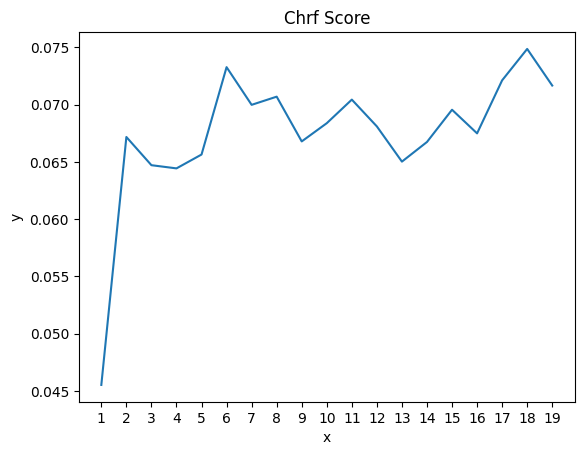

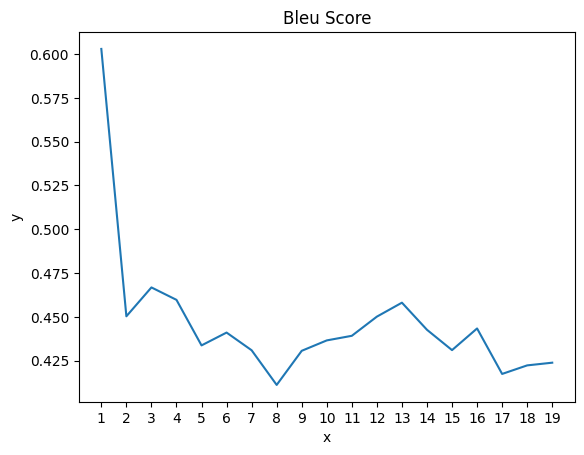

In [ ]:
import math
import matplotlib.pyplot as plt
y = ResultadosChrf
x = [x for x in  range(1, len(ResultadosChrf)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Chrf Score')
plt.show()

y = ResultadosBleu
x = [x for x in  range(1, len(ResultadosBleu)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bleu Score')
plt.show()

# Experimentos Cruzados - Train Isignos con datos uruguayos

In [ ]:
step=500
version=0
cantidad_steps=10000
while version <cantidad_steps:
  version=version+step
  nombre="_step_"+str(version)
  path="/content/drive/MyDrive/Proyecto/Prueba/Trainisignos/"+nombre+".pt"
  salida="/content/drive/MyDrive/Proyecto/Prueba/ExperimentosCruzados/DatosUruguayosconisignos"+nombre+".txt"
  !onmt_translate -model {path} -src "/content/drive/MyDrive/Proyecto/Prueba/data/DatosUruguayos/Spoken_Test.txt" -output {salida}  -verbose

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 5-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


[0.040780377931276535, 0.07687620525993948, 0.06460131022671198, 0.06355948925479026, 0.07177477706211402, 0.07672370335344916, 0.08023666027914424, 0.08360862387467076, 0.08066585940083768, 0.06735872515451494, 0.07550801336086675, 0.07068471925941969, 0.08411683696970255, 0.07590430587039097, 0.08442580302201151, 0.06938229210234195, 0.07733007343098398, 0.08877450748466507, 0.08568389902093891]
[0.6341463414634146, 0.4423076923076923, 0.4806201550387597, 0.4870848708487085, 0.39308176100628933, 0.4712230215827338, 0.3942857142857143, 0.4068767908309456, 0.4199395770392749, 0.44256756756756754, 0.4131054131054131, 0.42679127725856697, 0.4339080459770115, 0.41515151515151516, 0.43425076452599387, 0.43728813559322033, 0.39058171745152354, 0.3925, 0.39185750636132316]


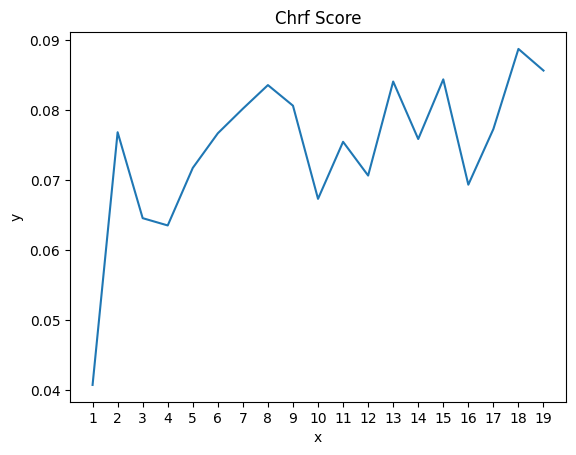

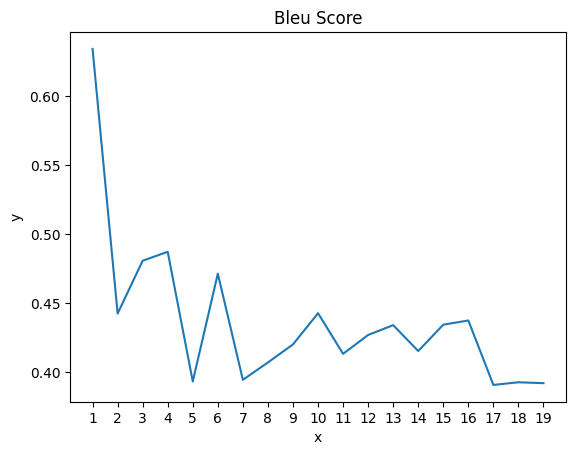

In [ ]:
from sacrebleu.metrics import BLEU
from nltk.translate import meteor,chrf_score
from nltk import word_tokenize
from torchmetrics import CHRFScore
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.translate.meteor_score import meteor_score

import math
import matplotlib.pyplot as plt

ResultadosBleu=[]
ResultadosChrf=[]
step=500
version=500
cantidad_steps=10000
target="/content/drive/MyDrive/Proyecto/Prueba/data/DatosUruguayos/Glosses_Test.txt"

with open(target,'r', encoding='utf-8') as f:
    refs   = f.readlines()
    f.close()
for ref in refs:
  ref=ref.split()
while version <10000:
  version=version+step
  nombre="_step_"+str(version)
  pred="/content/drive/MyDrive/Proyecto/Prueba/ExperimentosCruzados/DatosUruguayosconisignos"+nombre+".txt"

  with open(pred,'r', encoding='utf-8') as f:
    hyps   = f.readlines()
    f.close()
  for hyp in hyps:
    hyp=hyp.split()

  bleu = BLEU()
  weights = (1, 0, 0, 0,0.0)
  bleu_score_corpus = corpus_bleu(refs,hyps,weights)
  ResultadosBleu.append(bleu_score_corpus)
  chrf_score_corpus = chrf_score.corpus_chrf(refs, hyps)
  ResultadosChrf.append(chrf_score_corpus)

print(ResultadosChrf)
print(ResultadosBleu)

y = ResultadosChrf
x = [x for x in  range(1, len(ResultadosChrf)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Chrf Score')
plt.show()

y = ResultadosBleu
x = [x for x in  range(1, len(ResultadosBleu)+1)]
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bleu Score')
plt.show()

# Prueba isignos+iddl

In [ ]:
!onmt_build_vocab -config  /content/drive/MyDrive/Proyecto/Prueba/dataisignos+iddl.yaml -n_sample -1

2023-10-01 01:40:34.471450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 01:40:35.914691: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-01 01:40:37.299540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 01:40:37.299996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [ ]:
!onmt_train -config /content/drive/MyDrive/Proyecto/Prueba/dataisignos+iddl.yaml

# Transcripcion(No Anduvo)

In [3]:
!onmt_build_vocab -config  /content/drive/MyDrive/Proyecto/PruebaMejoraTranscripcion/dataMejoraTranscripcion.yaml -n_sample -1

2023-11-18 02:21:00.502721: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 02:21:00.502782: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 02:21:00.502819: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 02:21:00.510606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 02:21:01.630447: W tensorflow/c

In [5]:
!onmt_train -config   /content/drive/MyDrive/Proyecto/PruebaMejoraTranscripcion/dataMejoraTranscripcion.yaml

Se han truncado las últimas 5000 líneas del flujo de salida.
			* corpus_1: 1608
[2023-11-18 02:28:15,592 INFO] Weighted corpora loaded so far:
			* corpus_1: 1609
[2023-11-18 02:28:15,603 INFO] Weighted corpora loaded so far:
			* corpus_1: 1610
[2023-11-18 02:28:15,613 INFO] Weighted corpora loaded so far:
			* corpus_1: 1611
[2023-11-18 02:28:15,623 INFO] Weighted corpora loaded so far:
			* corpus_1: 1612
[2023-11-18 02:28:15,634 INFO] Weighted corpora loaded so far:
			* corpus_1: 1613
[2023-11-18 02:28:15,644 INFO] Weighted corpora loaded so far:
			* corpus_1: 1614
[2023-11-18 02:28:15,654 INFO] Weighted corpora loaded so far:
			* corpus_1: 1615
[2023-11-18 02:28:15,664 INFO] Weighted corpora loaded so far:
			* corpus_1: 1616
[2023-11-18 02:28:15,685 INFO] Weighted corpora loaded so far:
			* corpus_1: 1617
[2023-11-18 02:28:15,703 INFO] Weighted corpora loaded so far:
			* corpus_1: 1618
[2023-11-18 02:28:15,729 INFO] Weighted corpora loaded so far:
			* corpus_1: 1619
[2023-

In [ ]:
!onmt_translate -model "/content/drive/MyDrive/Colab Notebooks/PruebaMejoraTranscripcion/training/model_step_1000.pt" -src "/content/drive/MyDrive/Colab Notebooks/PruebaMejoraTranscripcion/Test_Src.txt" -output "/content/drive/MyDrive/Colab Notebooks/PruebaMejoraTranscripcion/training/pred_test.txt"  -verbose

In [ ]:
from sacrebleu.metrics import BLEU


with open('/content/drive/MyDrive/Colab Notebooks/PruebaMejoraTranscripcion/training/pred_test.txt','r', encoding='utf-8') as f:
    hyps   = f.readlines()
    f.close()

with open('/content/drive/MyDrive/Colab Notebooks/PruebaMejoraTranscripcion/Test_Target.txt','r', encoding='utf-8') as f:
    refs   = f.readlines()
    f.close()
bleu = BLEU()

result = bleu.corpus_score(hyps, refs)
print(result)